In [31]:
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
import os
os.getcwd()

'C:\\Users\\fpalash\\Desktop\\R_and_Kaggle\\Python\\PRACTICE\\ML\\k_Means'

In [6]:
# change working directory 
os.chdir('C:/Users/fpalash/Desktop/R_and_Kaggle/Python/PRACTICE/ML/k_Means/movie_dataset')

In [8]:
df = pd.read_csv('movies_metadata.csv')
df.head(2)

C:\Users\fpalash\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [13]:
df.shape

(45466, 24)

In [9]:
list(df)

['adult',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count']

In [10]:
#k-means doesn't take categorical variables, so we need to handle categorical variables
# for this analysis let's work only on numeric variables
df_numeric = df[['budget','popularity','revenue','runtime','vote_average','vote_count','title']]

In [11]:
df_numeric.head()
#we'll keep titles also to interpret the results at the end

,budget,popularity,revenue,runtime,vote_average,vote_count,title
0,30000000,21.9469,373554033.0,81.0,7.7,5415.0,Toy Story
1,65000000,17.0155,262797249.0,104.0,6.9,2413.0,Jumanji
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men
3,16000000,3.85949,81452156.0,127.0,6.1,34.0,Waiting to Exhale
4,0,8.38752,76578911.0,106.0,5.7,173.0,Father of the Bride Part II


In [12]:
df_numeric.isnull().sum()

budget            0
popularity        5
revenue           6
runtime         263
vote_average      6
vote_count        6
title             6
dtype: int64

In [15]:
# to keep this analysis ultra-simple, let's delete all the rows with na value
df_numeric.dropna(inplace=True)

C:\Users\fpalash\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
df_numeric.isnull().sum()

budget          0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
title           0
dtype: int64

In [17]:
df_numeric.describe()

,revenue,runtime,vote_average,vote_count
count,4.520300e+04,45203.000000,45203.000000,45203.000000
mean,1.127300e+07,94.128199,5.629368,110.506515
std,6.450932e+07,38.407810,1.908909,492.638190
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [20]:
#run this code to suppress scientific notation in 
pd.options.display.float_format = '{:.2f}'.format

In [21]:
df_numeric.describe()

,revenue,runtime,vote_average,vote_count
count,45203.00,45203.00,45203.00,45203.00
mean,11272997.76,94.13,5.63,110.51
std,64509315.54,38.41,1.91,492.64
min,0.00,0.00,0.00,0.00
25%,0.00,85.00,5.00,3.00
50%,0.00,95.00,6.00,10.00
75%,0.00,107.00,6.80,34.00
max,2787965087.00,1256.00,10.00,14075.00


In [22]:
# 50% movies has less than 10 voters so let's consider only top 25% of thr movies than is vote count >= 34
df_numeric['vote_count'].quantile(np.arange(.75,1,0.01))

0.75     34.00
0.76     37.00
0.77     40.00
0.78     43.00
0.79     46.00
0.80     51.00
0.81     55.00
0.82     61.00
0.83     67.00
0.84     74.00
0.85     83.00
0.86     92.00
0.87    104.74
0.88    119.00
0.89    139.00
0.90    161.00
0.91    193.00
0.92    230.00
0.93    283.00
0.94    349.00
0.95    435.90
0.96    581.00
0.97    827.94
0.98   1243.88
0.99   2196.84
Name: vote_count, dtype: float64

In [24]:
# subsetting our dataset
df_numeric = df_numeric[df_numeric['vote_count']>30]

In [25]:
df_numeric.shape

(12178, 7)

In [26]:
# let's normalize data using min-max scaling 
# if variables are too different from each other scaling becomes an important step in clustering
from sklearn import preprocessing
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df_numeric.drop('title',axis=1))
df_numeric_scaled = pd.DataFrame(minmax_processed, index=df_numeric.index, columns=df_numeric.columns[:-1])

In [27]:
df_numeric_scaled.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,0.08,0.04,0.13,0.09,0.81,0.38
1,0.17,0.03,0.09,0.12,0.73,0.17
2,0.00,0.02,0.00,0.12,0.68,0.00
3,0.04,0.01,0.03,0.14,0.64,0.00
4,0.00,0.02,0.03,0.12,0.60,0.01


In [28]:
# Let's fit cluster size 1 to 20 on our data and take a look at the corresponding score value.
# and we will check the elbow curve for different cluster size and decide on the optimum number of the clusters
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

In [29]:
score = [kmeans[i].fit(df_numeric_scaled).score(df_numeric_scaled) for i in range(len(kmeans))]

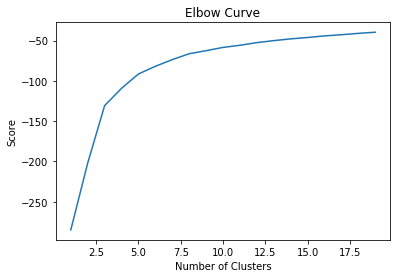

In [32]:
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [35]:
# Our Elbow point is around cluster size of 5. We will use k=5 to further interpret our clustering result (we could choose a higher number also)
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_numeric_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
len(kmeans.labels_)

12178

In [36]:
df_numeric['cluster'] = kmeans.labels_
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
0,30000000,21.95,373554033.00,81.00,7.70,5415.00,Toy Story,3
1,65000000,17.02,262797249.00,104.00,6.90,2413.00,Jumanji,1
2,0,11.71,0.00,101.00,6.50,92.00,Grumpier Old Men,2
3,16000000,3.86,81452156.00,127.00,6.10,34.00,Waiting to Exhale,2
4,0,8.39,76578911.00,106.00,5.70,173.00,Father of the Bride Part II,2


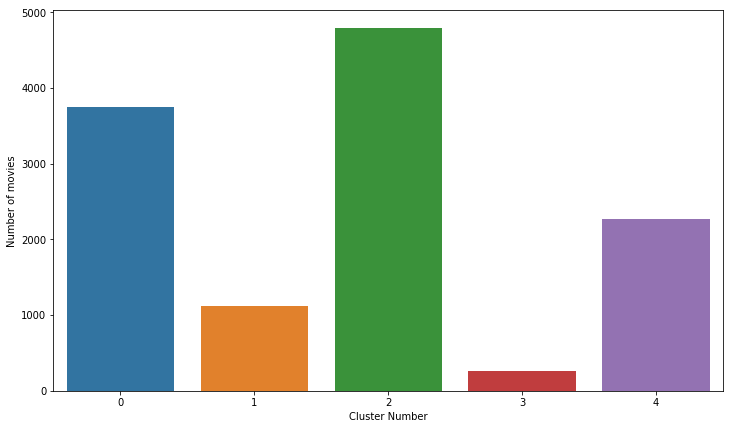

In [38]:
#cluster result
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=df_numeric.groupby(['cluster']).count()['budget'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

In [39]:
# important step to label the cluster, which is nothing but identifying different types of cluster using mean values of cluster
df_numeric.groupby(['cluster']).mean()

,revenue,runtime,vote_average,vote_count
cluster,,,,
0,16879694.69,109.90,7.28,304.51
1,161641302.08,114.29,6.21,1129.97
2,14440181.62,100.40,6.19,169.59
3,628864906.12,126.15,6.90,4738.10
4,10280551.45,93.72,4.94,122.63


In [40]:
#We see that one cluster which is also the smallest, is the cluster of movies that
#received maximum number of votes(in terms of counts) and also have very high popularity and total runtime and net revenue. 
#Let's see some of the movies that belong to this cluster.

size_array = list(df_numeric.groupby(['cluster']).count()['budget'].values)
size_array
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[0])].sample(5)


,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
26558,280000000,37.38,1405403694.00,141.00,7.30,6908.00,Avengers: Age of Ultron,3
10973,210000000,0.87,459359555.00,104.00,6.30,3581.00,X-Men: The Last Stand,3
30396,160000000,26.63,653428261.00,137.00,6.60,4117.00,The Hunger Games: Mockingjay - Part 2,3
30761,245000000,24.93,880674609.00,148.00,6.30,4552.00,Spectre,3
21941,170000000,34.91,644571402.00,112.00,6.80,4873.00,Thor: The Dark World,3


In [41]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[1])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
5851,52000000,19.83,352114312.00,141.00,7.70,3917.00,Catch Me If You Can,1
18006,45000000,10.67,160078586.00,101.00,6.00,1026.00,Johnny English Reborn,1
3900,45000000,9.51,212000000.00,111.00,6.10,987.00,Miss Congeniality,1
11466,85000000,11.06,59908565.00,167.00,6.30,342.00,The Good Shepherd,1
9392,140000000,12.82,209073645.00,108.00,6.70,1521.00,Lemony Snicket's A Series of Unfortunate Events,1


In [42]:
#Lastly, let's take a look at the least successful movies. This cluster represents the movies that recieved least number of votes and also has the smallest runtime, revenue and popularity score.
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[-1])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
33394,0,12.945544,1982505.00,120.00,6.00,158.00,A Bigger Splash,2
20572,0,2.70,0.00,120.00,6.50,37.00,The Silence,2
44674,0,6.365691,0.00,101.00,6.00,35.00,Goon: Last of the Enforcers,2
4800,0,13.87,0.00,102.00,6.10,31.00,Funeral in Berlin,2
9757,0,1.20,0.00,101.00,5.60,32.00,Tombs of the Blind Dead,2


In [43]:
# As we can see this cluster also includes the movies for which our dataset has no information about the budget and revenue,
# hence there corresponding fields have 0 value in it. This pulls down the net revenue of the whole cluster. 
# If we keep the cluster size slightly larger, we might get to see these movies clustered separately.